In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# CMP 3002 
## Arrays / Linked List

## Review

## Arrays

```
An array is a collection of items. 
```
- The items could be integers, strings, booleans, pointers, etc. 
- Items are stored in contiguous memory locations
- Each item has an associated index (address, register)
- Since they are stored together, going through all the items is straightforward

### Properties

- Capacity - the number of elements that we can store
- Length - the number of elements currently in the array
- Read and write are primitive operations of complexity $O(1)$
- More complex operations are based on read and write

In [2]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n, values=None):
        self.item_count = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)  
            
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()
                
        
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        if not self[item_index]:
            self.item_count += 1
        self.array[item_index] = item
    
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.item_count] = item
            self.item_count += 1
            
    def list_array(self):
        """
        List elements of the array
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)
    
    def _append(self, item):
        """
        Add new item to the beginning of the array
        """
        if self.item_count == self.n:
            raise ValueError("no more capacity")
            
        i = self.item_count
        while (i > 0):
            self.array[i] = self.array[i-1]
            i -= 1
        self.array[0] = item
        self.item_count += 1
            

### Insert

`A = [0, 3, 4, _, _]`

Element to insert: `x=8`

Index: `1`

`A = [0, 8, 3, 4, _]`


In [3]:
def insert(array, index, element):
    """
    implementation of insert
    """
    if (index < 0) or (index > array.item_count):
        raise IndexError('index out of range!')
    x = array.item_count
    while x > index:
        array.array[x] = array.array[x-1]
        x -= 1
    array.array[index] = element
    array.item_count += 1
    

In [4]:
A = Array(10)

In [5]:
insert(A,0,-1)
A.list_array()

'-1, _, _, _, _, _, _, _, _, _'

In [6]:
# Insert at the beginning
insert(A,0,2)
A.list_array()

'2, -1, _, _, _, _, _, _, _, _'

In [7]:
# Insert at the end
insert(A,2,4)
A.list_array()

'2, -1, 4, _, _, _, _, _, _, _'

In [8]:
# Insert in the middle
insert(A,1,3)
A.list_array()

'2, 3, -1, 4, _, _, _, _, _, _'

In [9]:
A.item_count

4

### Delete 

`A = [0, 3, 4, 8, 7]`

Index: `2`

`A = [0, 3, 8, 7, _]`

In [10]:
def delete(array, index):
    """
    implementation of delete
    """
    if (index < 0) or (index >= array.item_count):
        raise IndexError('index out of range!')
    for x in range(index, array.item_count-1):
        array.array[x] = array.array[x+1]
    array.array[array.item_count - 1] = None
    array.item_count -= 1

In [11]:
A.list_array()

'2, 3, -1, 4, _, _, _, _, _, _'

In [12]:
# Delete in the middle
delete(A, 2)
A.list_array()

'2, 3, 4, _, _, _, _, _, _, _'

In [13]:
# Delete at the beginning
delete(A, 0)
A.list_array()

'3, 4, _, _, _, _, _, _, _, _'

In [14]:
# Delete at the end
delete(A, 1)
A.list_array()

'3, _, _, _, _, _, _, _, _, _'

### Array Search

- Most important operation of all
- It comes down to how fast the search occurs
- It's important to understand the memory requirement imposed by the data structure


A = [1, 7, 0, -2, 4]
input = valor a buscar
output = index

O(n)

### Linear search
- Index not known
- Check each element in the Array until we find the element or we reach the end
- Complexity is $O(n)$

In [15]:
def linear_search(array, element):
    """
    Return the index of element
    """
    for i in range(array.item_count):
        if array[i] == element:
            return i
    return None
        

In [16]:
import random
R = list(range(25))
random.shuffle(R)

In [17]:
Ar = Array(25, R)

In [18]:

Ar.list_array()

'6, 18, 17, 8, 12, 15, 9, 5, 1, 10, 2, 11, 24, 16, 19, 21, 7, 0, 13, 4, 20, 23, 22, 3, 14'

In [19]:
linear_search(Ar,19)

14

In [20]:
linear_search(Ar,6)

0

In [21]:
linear_search(Ar,34)

## Linked Lists

### Properties

- Similar to arrays, linked list is a linear data structure
- Each element is a separate object
- All objects are linked together by a reference field in each element
- Two types: 
    * Singly linked lists
    * Doubly linked lists

### Singly linked lists

<img src="linked_list.png" alt="drawing" style="width:400px;"/>

Each node has two parts:
- value
- reference field to link to the next node

In [22]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node

In [23]:
m1 = Node("Jan")
m2 = Node("Feb")
m3 = Node("March")

# link m2 to m3
m1.set_next_node(m2)
# link m3 to m4
m2.set_next_node(m3)

list1 = Singly_linked_list(m1)

<img src="example_linked_list.png" alt="drawing" style="width:400px;"/>

### Operations

- traverse
- insert
- delete

### Traverse

- Unlike arrays, we can't read a node in singly linked list in $O(1)$
- To access an element, we need to traverse from the head to the node one by one
- Complexity of getting to a node is $O(n)$, for $n$ being the size of the linked list

In [24]:
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node

In [25]:
m1 = Node("Jan")
m2 = Node("Feb")
m3 = Node("March")

m1.set_next_node(m2)
m2.set_next_node(m3)

list1 = Singly_linked_list(m1)

list1.list_traversed()

Jan
Feb
March


### Insertion

- insert at the beginning
- insert at the end
- insert after a given node

### At the beginning

<img src="insert_head1_linked_list.png" alt="drawing" style="width:400px;"/>

- Simply connect the new node to the head of the list
- The new node is the head of the list


<img src="insert_head2_linked_list.png" alt="drawing" style="width:500px;"/>

- Complexity $O(1)$

### At the end

<img src="insert_head1_linked_list.png" alt="drawing" style="width:400px;"/>

- Find the tail node
- Connect the tail to the new node
- The new node is the new tail

<img src="insert_tail2_linked_list.png" alt="drawing" style="width:500px;"/>

- Complexity $O(n)$

### After a given node

<img src="insert_head1_linked_list.png" alt="drawing" style="width:400px;"/>

- Find the given node
- Connect this node to the new node
- Connect the new node to the previous next

<img src="insert_prev2_linked_list.png" alt="drawing" style="width:500px;"/>

- Complexity $O(n)$

### Exercise

Implement insert

### Homework hint

To do a plot, create a data frame (equivalent to a Excel Spreadsheet)


In [26]:
# Primero calculen el tiempo de ejecucion de la funcion
def sum_n(n):
    start = 1000000*time.time()
    total = 0
    for i in range(1,n+1):
        total += i
    return 1000000*time.time() - start

In [27]:
# Capturen ese tiempo en una lista
tiempo = []
for n in range(1,10):
    tiempo.append(sum_n(n))

In [28]:
# Almacenen esos datos en un dataframe
df = pd.DataFrame()
df['n'] = range(1,10)
df['time'] = tiempo

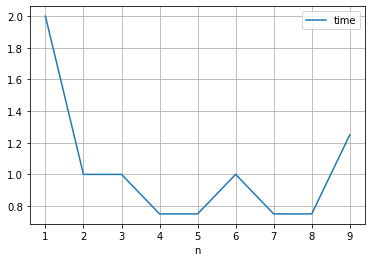

In [31]:
# Grafiquen
df.plot(x='n', y='time')
plt.grid()